# Vincent Purcell
##### Data Mining 2 - Final Project #####

### Set up MongoDB Connections ###

In [1]:
import pymongo

# MongoDB Connections
client = pymongo.MongoClient('mongodb://localhost:27017')
db = client['MLB_DB']

In [2]:
def getStatAvg(stats_list, projections_str, player_projected_stats_doc):
    stat_averages = [0] * len(stats_list)
    count = 0
    for player in player_projected_stats_doc[projections_str].values():
        stat_index = 0
        for stat in stats_list:
            try:
                stat_val = float(player[stat])
            except:
                stat_val = 0
            stat_averages[stat_index] = stat_averages[stat_index] + stat_val
            stat_index = stat_index + 1
        count = count + 1
    stat_averages = [i/count for i in stat_averages]
    return stat_averages

In [3]:
import datahelp

def getData(summaryDB, PlayerDataDB, PlayerProjectionsDB):
    columns = datahelp.columns
    data = []
    for document in summaryDB.find():
        game_id = document['game_id_num']
        for player_data in PlayerDataDB.find({'game_id_num': str(game_id)}):
            home_umpire = [player_data['umpires']['home']['id']]
        for player_projections in PlayerProjectionsDB.find({'game_id_num': str(game_id)}):
            # Get Stat averages
            home_batting_avg = getStatAvg(datahelp.batting_stats, 'home_batting_projections', player_projections)
            away_batting_avg = getStatAvg(datahelp.batting_stats, 'away_batting_projections', player_projections)
            home_pitching = getStatAvg(datahelp.pitching_stats, 'home_pitcher_projections', player_projections)
            away_pitching = getStatAvg(datahelp.pitching_stats, 'away_pitcher_projections', player_projections)
        home_win = [1 if document['home_score']>document['away_score'] else 0]
        data_row = home_batting_avg + away_batting_avg + home_pitching + away_pitching + home_umpire + home_win
        data.append(data_row)
    return data


In [4]:
gameSummaryDB = db['GameSummary']
gamePlayerDataDB = db['GamePlayerData']
playerProjectionsDB = db['PlayerProjectedStats']

data = getData(gameSummaryDB, gamePlayerDataDB, playerProjectionsDB)

In [5]:
import numpy as np
import pandas as pd
import datahelp

columns = datahelp.columns

data_df = pd.DataFrame(np.array(data), columns=columns)
print("Data count (rows, columns) : " + str(data_df.shape))
data_df.head()

Data count (rows, columns) : (1202, 34)


home hr avg  home rbi avg  home tb avg  home avg avg  home ops avg  \
0    15.222222     80.666667   283.111111      0.259111      0.715444   
1    16.777778     77.444444   273.888889      0.250778      0.701222   
2    16.333333     63.222222   214.555556      0.230000      0.673111   
3    18.555556     78.222222   265.444444      0.254111      0.722778   
4    17.555556     81.444444   280.888889      0.262444      0.728667   

   home so avg  home tpa avg  home obp avg  away hr avg  away rbi avg  ...  \
0   160.888889    800.333333      0.321556    29.000000    117.666667  ...   
1   158.555556    768.888889      0.316111    30.222222    102.888889  ...   
2   130.444444    586.777778      0.295556    25.666667     83.777778  ...   
3   158.555556    720.000000      0.316111    23.555556     89.222222  ...   
4   150.222222    752.888889      0.319111    27.111111     86.222222  ...   

   away pitching hr  away pitching wpct  away pitching era  \
0              14.0               0.667               3.67   
1               9.0               0.167               5.46   
2              35.0               0.318               6.10   
3              46.0               0.478               3.89   
4              30.0               0.429               4.86   

   away pitching outs  away pitching whip  away pitching h  away pitching ip  \
0               427.0                1.41            158.0             142.1   
1               173.0                1.63             70.0              57.2   
2               575.0                1.57            226.0             191.2   
3              1166.0                1.34            371.0             388.2   
4               766.0                1.54            264.0             255.1   

   away pitching pa  umpire_id  home win  
0             617.0   484499.0       0.0  
1             265.0   482666.0       0.0  
2             869.0   427315.0       0.0  
3            1654.0   428442.0       1.0  
4            1143.0   427044.0       1.0  

[5 rows x 34 columns]

C:\Users\vin99\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


home hr avg  home rbi avg  home tb avg  home avg avg  home ops avg  \
976     22.222222     83.444444   273.555556      0.241889      0.693444   
136     37.666667    113.777778   357.444444      0.264889      0.813000   
1092    11.000000     35.666667   117.444444      0.220444      0.663444   
981     28.000000    100.222222   313.000000      0.253667      0.770778   
620     33.777778    129.000000   393.555556      0.262778      0.770889   

      home so avg  home tpa avg  home obp avg  away hr avg  away rbi avg  ...  \
976    132.555556    755.111111      0.304667    42.333333    126.888889  ...   
136    182.777778    828.888889      0.329889    34.222222    121.555556  ...   
1092    85.666667    341.111111      0.292222    11.111111     41.666667  ...   
981    190.888889    800.000000      0.327778    23.333333     82.000000  ...   
620    171.888889   1001.777778      0.336667    22.666667     84.555556  ...   

      home pitching pa  away pitching hr  away pitching wpct  \
976              816.0              15.0               0.625   
136             1559.0               4.0               0.600   
1092             371.0               9.0               0.600   
981             1723.0              57.0               0.344   
620             1655.0              28.0               0.385   

      away pitching era  away pitching outs  away pitching whip  \
976                4.12               275.0                1.13   
136                5.30               107.0                1.43   
1092               3.48               155.0                1.20   
981                5.72               699.0                1.40   
620                4.68               629.0                1.37   

      away pitching h  away pitching ip  away pitching pa  umpire_id  
976              85.0              91.2             377.0   521251.0  
136              34.0              35.2             162.0   503493.0  
1092             43.0              51.2             215.0   427139.0  
981             252.0             233.0            1024.0   547380.0  
620             214.0             209.2             912.0   427128.0  

[5 rows x 33 columns]

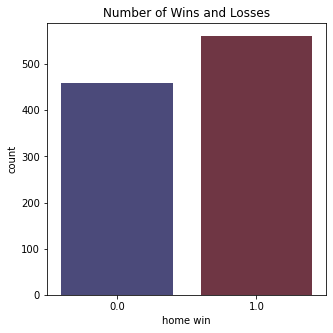

In [6]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X = data_df.drop(['home win'], axis = 1)
y = data_df['home win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 15)
# visualize number of digits classes
plt.figure(figsize=(5,5))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of Wins and Losses")
y_train.value_counts()

X_train.head()

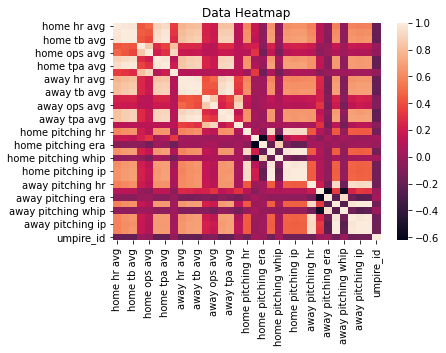

In [7]:
sns.heatmap(X_train.corr()).set_title("Data Heatmap");

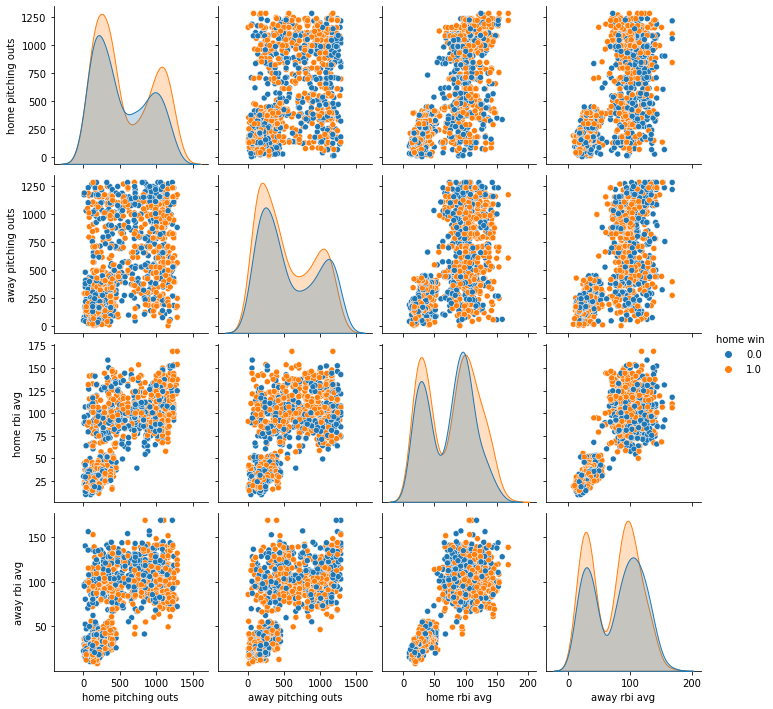

In [8]:
sns.pairplot(data_df, hue='home win', vars=['home pitching outs', 'away pitching outs','home rbi avg', 'away rbi avg']);

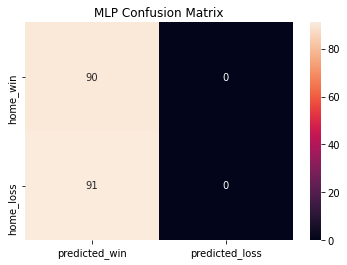

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(50,75,98), max_iter=2000)
mlp.fit(X_train,y_train)
y_predict = mlp.predict(X_test)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['home_win', 'home_loss'],
                         columns=['predicted_win','predicted_loss'])
sns.heatmap(confusion, annot=True)
plt.title("MLP Confusion Matrix");

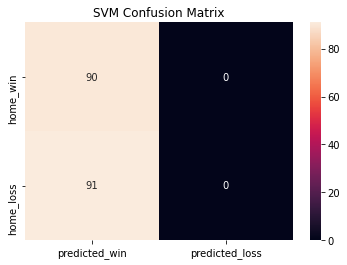

In [15]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['home_win', 'home_loss'],
                         columns=['predicted_win','predicted_loss'])
sns.heatmap(confusion, annot=True)
plt.title("SVM Confusion Matrix");

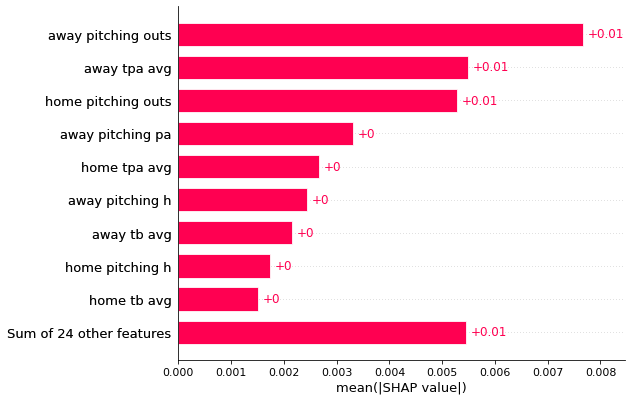

In [16]:
import shap
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_poly.fit(X_train, y_train)
y_predict = svr_poly.predict(X_test)
explainer = shap.explainers.Permutation(svr_poly.predict, X_test)
shap_values_svc = explainer(X_test[:100], silent=True)
shap.plots.bar(shap_values_svc)

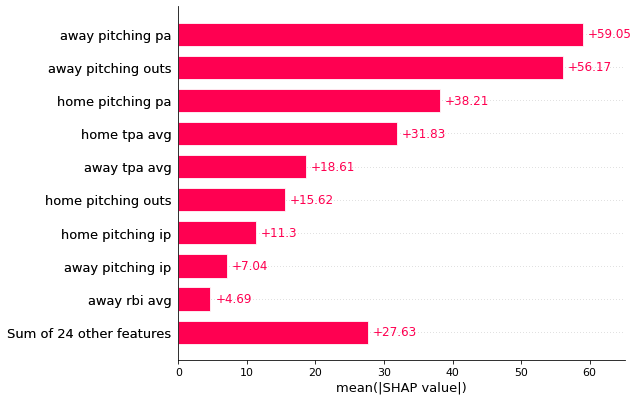

In [17]:
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)
y_predict = mlp_regr.predict(X_test)
explainer = shap.explainers.Permutation(mlp_regr.predict, X_test)
shap_values_svc = explainer(X_test[:100], silent=True)
shap.plots.bar(shap_values_svc)

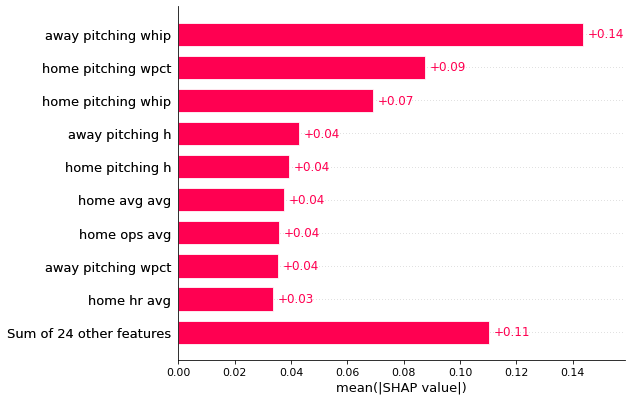

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=7)
dt_regr.fit(X_test,y_test)
explainer = shap.explainers.Permutation(dt_regr.predict, X_test)
shap_values_svc = explainer(X_test[:100], silent=True)
shap.plots.bar(shap_values_svc)

Decision Tree Classification (max depth =3)
Number of mislabeled points out of a total 181 points: 56
Accuracy: 0.690608


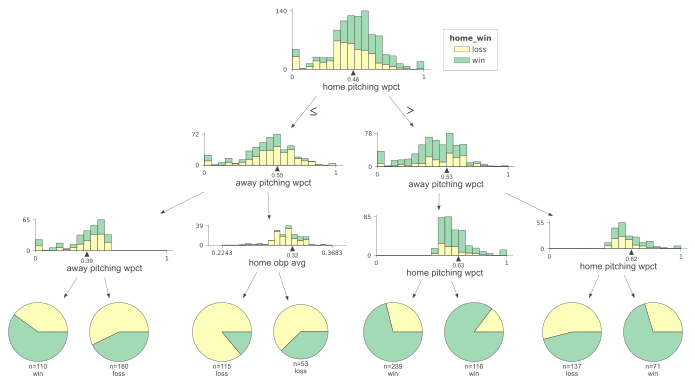

In [19]:
from sklearn import tree
from dtreeviz.trees import *
import dtreeviz as dtviz


max_depth = 3
clf_dt = tree.DecisionTreeClassifier(max_depth=max_depth)
clf_dt = clf_dt.fit(X_train, y_train)
#plt.figure(figsize=(35,12))
#tree.plot_tree(clf_dt,feature_names=columns,class_names=['loss','win'],rounded=True,fontsize=8);
#plt.show()
predictions_dt = clf_dt.predict(X_test)
accuracy = 1-(((y_test != predictions_dt).sum())/len(X_test))
print("Decision Tree Classification (max depth =" + str(max_depth) + ")")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_dt).sum()))
print("Accuracy: %f" % (accuracy))



viz = dtviz.trees.dtreeviz(clf_dt,
                   X_train,
                   y_train,
                   target_name='home_win',
                   feature_names=columns[:-1],
                   orientation="TD",
                   class_names=['loss','win'],
                   fancy=True,
                   X=None,
                   label_fontsize=12,
                   ticks_fontsize=8,
                   fontname="Arial")

viz

In [20]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
#plt.figure(figsize=(100,15))
#tree.plot_tree(clf_dt,feature_names=columns,class_names=['loss','win'],rounded=True,fontsize=7);
#plt.savefig('dtree_high_dpi',dpi=600)
predictions_dt = clf_dt.predict(X_test)
accuracy = 1-(((y_test != predictions_dt).sum())/len(X_test))
print("Decision Tree Classification")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_dt).sum()))
print("Accuracy: %f" % (accuracy))

Decision Tree Classification
Number of mislabeled points out of a total 181 points: 71
Accuracy: 0.607735


Random Forest Classification
max depth = 7, criterion = entropy
Number of mislabeled points out of a total 181 points: 56
Accuracy: 0.690608


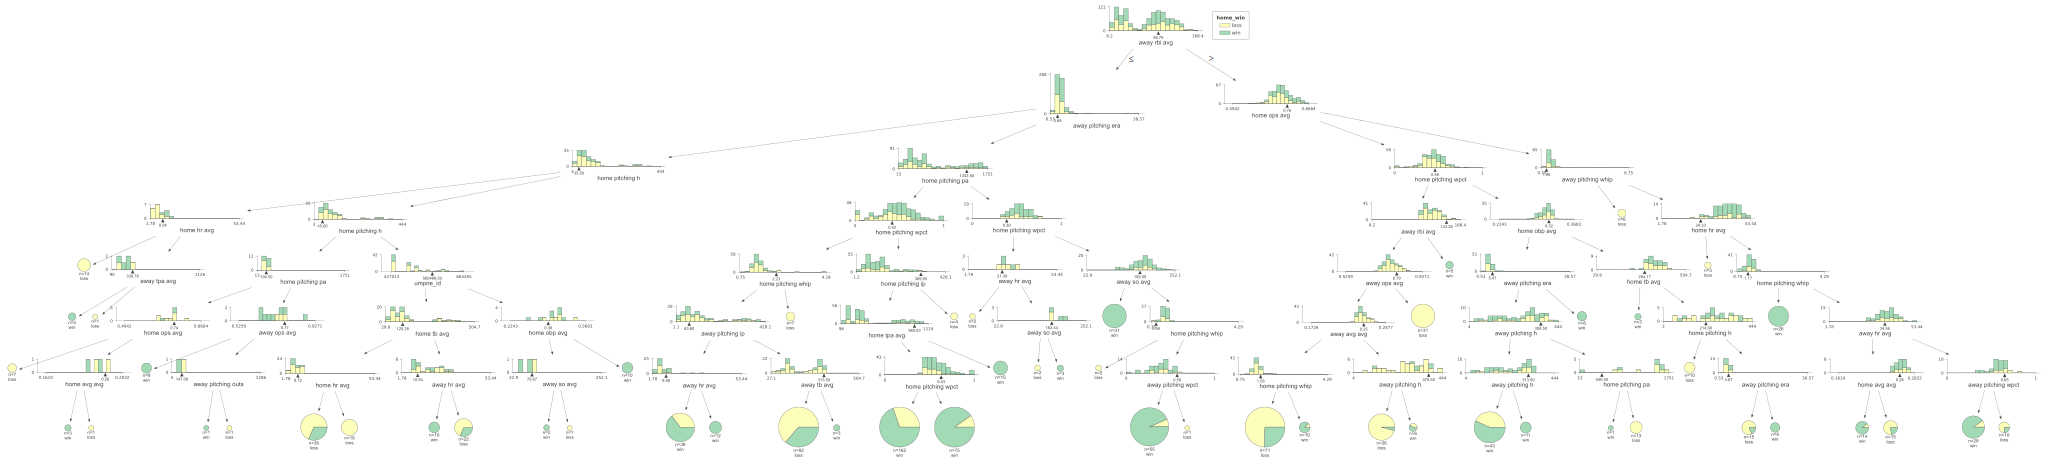

In [47]:
from sklearn.ensemble import RandomForestClassifier

max_depth = 7
criterion = "entropy"
clf_rf = RandomForestClassifier(max_depth=max_depth, random_state=0, criterion="entropy", n_estimators=150)
clf_rf.fit(X_train, y_train)
predictions_rf = clf_rf.predict(X_test)

accuracy = 1-(((y_test != predictions_rf).sum())/len(X_test))
print("Random Forest Classification")
print("max depth = " + str(max_depth) + ", criterion = " + criterion)
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_rf).sum()))
print("Accuracy: %f" % (accuracy))

estimator = clf_rf.estimators_[5]

viz = dtviz.trees.dtreeviz(estimator,
                   X_train,
                   y_train,
                   target_name='home_win',
                   feature_names=columns[:-1],
                   orientation="LR",
                   class_names=['loss','win'],
                   fancy=True,
                   X=None,
                   label_fontsize=12,
                   ticks_fontsize=8,
                   fontname="Arial")

viz

In [50]:
gameSummaryFutureDB = db['GameSummaryFutureGames']
gamePlayerDataFutureDB = db['GamePlayerDataFutureGames']
playerProjectionsFutureDB = db['PlayerProjectedStatsFutureGames']

future_data = getData(gameSummaryFutureDB, gamePlayerDataFutureDB, playerProjectionsFutureDB)

future_data_df = pd.DataFrame(np.array(future_data), columns=columns)
print("Data count (rows, columns) : " + str(future_data_df.shape))

y_test_future = future_data_df['home win']

future_data_df = future_data_df.drop(['home win'], axis = 1)
future_data_df


Data count (rows, columns) : (11, 34)


home hr avg  home rbi avg  home tb avg  home avg avg  home ops avg  \
0     11.888889     45.777778   134.111111      0.249222      0.756111   
1     16.666667     53.777778   160.444444      0.269000      0.771778   
2     10.666667     31.111111   112.888889      0.240333      0.703000   
3     12.222222     46.333333   139.222222      0.277778      0.811556   
4     13.555556     47.444444   148.888889      0.258111      0.784889   
5     13.111111     42.777778   127.555556      0.230111      0.721667   
6     10.000000     36.555556   105.777778      0.253222      0.751667   
7     10.444444     37.000000   124.111111      0.240778      0.693889   
8      6.111111     17.444444    62.444444      0.215778      0.634444   
9     13.444444     47.888889   155.222222      0.261000      0.756333   
10    10.555556     35.222222   109.888889      0.232667      0.717222   

    home so avg  home tpa avg  home obp avg  away hr avg  away rbi avg  ...  \
0     85.111111    352.111111      0.329000    10.333333     37.777778  ...   
1     73.222222    356.777778      0.320444     8.555556     33.222222  ...   
2     67.111111    279.666667      0.298444    19.000000     59.333333  ...   
3     60.111111    333.888889      0.340778    13.777778     42.777778  ...   
4     80.555556    389.444444      0.345889    15.222222     42.000000  ...   
5     72.555556    318.777778      0.304667     6.111111     21.333333  ...   
6     54.222222    256.000000      0.339444     6.888889     26.000000  ...   
7     60.666667    318.666667      0.299111     6.333333     24.444444  ...   
8     48.666667    176.888889      0.272222    11.375000     43.250000  ...   
9     73.000000    388.000000      0.332222    10.555556     36.666667  ...   
10    70.000000    275.444444      0.300444     5.444444     26.111111  ...   

    home pitching pa  away pitching hr  away pitching wpct  away pitching era  \
0               21.0               3.0               1.000               1.08   
1              463.0               1.0               0.000              10.80   
2              409.0               7.0               0.500               4.01   
3              392.0              18.0               0.429               4.10   
4              577.0               8.0               0.700               2.92   
5              441.0               1.0               0.000              12.00   
6              366.0              15.0               0.389               3.39   
7              628.0               2.0               0.000               1.84   
8              337.0               6.0               0.750               4.33   
9              279.0              11.0               0.615               3.18   
10             506.0              12.0               0.500               4.59   

    away pitching outs  away pitching whip  away pitching h  away pitching ip  \
0                 75.0                0.72             11.0              25.0   
1                  5.0                4.80              5.0               1.2   
2                101.0                1.10             26.0              33.2   
3                375.0                1.17            119.0             125.0   
4                277.0                1.14             78.0              92.1   
5                  9.0                2.67              8.0               3.0   
6                454.0                1.14            128.0             151.1   
7                 44.0                0.89             11.0              14.2   
8                156.0                1.35             45.0              52.0   
9                408.0                1.23            115.0             136.0   
10               153.0                1.39             47.0              51.0   

    away pitching pa  umpire_id  
0               90.0   427128.0  
1               13.0   521051.0  
2              140.0   644760.0  
3              517.0   427192.0  
4              375.0   484183.0  
5               

In [52]:
future_predictions = clf_rf.predict(future_data_df)

count = 0
for document in gameSummaryFutureDB.find():
    summary_string = document['away_name'] + ' @ ' + document['home_name'] + "  [" + document['game_datetime'] + "]"
    if future_predictions[count] == 1:
        print(summary_string)
        print("     winner: " + document['home_name'])
        #print("     winner: " + document['home_name'] + "  [proba: " + str(round(future_predictions[count],4)) + "]")
    else:
        print(summary_string)
        print("     winner: " + document['away_name'])
        #print("     winner: " + document['away_name'] + "  [proba: " + str(round(future_predictions[count],4)) + "]")
    count = count + 1

# accuracy = 1-(((y_test_future != future_predictions).sum())/len(future_data_df))
# print("Random Forest Classification")
# print("Number of mislabeled points out of a total %d points: %d" % ((len(future_data_df)), (y_test_future != future_predictions).sum()))
# print("Accuracy: %f" % (accuracy))

Chicago White Sox @ Tampa Bay Rays  [2021-08-22T17:10:00Z]
     winner: Chicago White Sox
Detroit Tigers @ Toronto Blue Jays  [2021-08-22T17:07:00Z]
     winner: Toronto Blue Jays
Atlanta Braves @ Baltimore Orioles  [2021-08-22T17:05:00Z]
     winner: Baltimore Orioles
Seattle Mariners @ Houston Astros  [2021-08-22T18:10:00Z]
     winner: Houston Astros
San Francisco Giants @ Oakland Athletics  [2021-08-22T20:07:00Z]
     winner: Oakland Athletics
Washington Nationals @ Milwaukee Brewers  [2021-08-22T18:10:00Z]
     winner: Milwaukee Brewers
Miami Marlins @ Cincinnati Reds  [2021-08-22T17:10:00Z]
     winner: Cincinnati Reds
Pittsburgh Pirates @ St. Louis Cardinals  [2021-08-22T18:15:00Z]
     winner: St. Louis Cardinals
Kansas City Royals @ Chicago Cubs  [2021-08-22T18:20:00Z]
     winner: Kansas City Royals
Philadelphia Phillies @ San Diego Padres  [2021-08-22T19:40:00Z]
     winner: San Diego Padres
Arizona Diamondbacks @ Colorado Rockies  [2021-08-22T19:10:00Z]
     winner: Colorad